In [1]:
%matplotlib notebook

Import python modules

Macroseismic functionality is currently part of the eqcatalog module (submodules eqcatalog.macro and eqcatalog.rob.seismodb). Maybe it could be a separate module in the furture.

In [2]:
import numpy as np
import eqcatalog
import mapping.seismogis as seismogis
giscat = seismogis.SeismoGisCatalog
giscat.load_collections()

## Query the database

Specify which earthquake to work with

In [3]:
## Alsdorf 2002
id_earth = 1306
## 1938
#id_earth = 509

Direct query

In [4]:
mdp_col = eqcatalog.rob.query_traditional_macro_catalog(id_earth)
mdp_col

<MDPCollection (n=501)>

Query earthquake catalog, then get macro info

In [5]:
[eq] = eqcatalog.rob.query_local_eq_catalog_by_id(id_earth)
mdp_col = eq.get_traditional_macroseismic_info()
mdp_col

<MDPCollection (n=501)>

Query options

In [6]:
eq.get_traditional_macroseismic_info?

'id_com': Limit query to one or several communes (default: None)

In [7]:
id_com = eqcatalog.rob.zip2ID(9000)
mdp_col = eq.get_traditional_macroseismic_info(id_com=id_com)
mdp_col

<MDPCollection (n=1)>

'data_type': to make a distinction between 'official' and 'historical' macroseismic data (generally not useful when dealing with 1 earthquake) (default: '' = both)
- official: linked with an enquiry form in the database
- historical: not linked with an enquiry form

In [8]:
data_type = 'historical'
mdp_col = eq.get_traditional_macroseismic_info(data_type=data_type)
mdp_col

<MDPCollection (n=13)>

'group_by_main_commune': whether to group the subcommunes in each main commune (only useful for earthquakes that happened before the fusion in 1970) (default: True)

In [9]:
mdp_col = eq.get_traditional_macroseismic_info(group_by_main_commune=True)
mdp_col

<MDPCollection (n=501)>

'min_fiability': minimum reliability assigned to macroseismic data (default: 80)

In [10]:
min_fiability = 90
mdp_col = eq.get_traditional_macroseismic_info(min_fiability=min_fiability)
mdp_col

<MDPCollection (n=0)>

## The MDP and MDPCollection classes

MDPCollection groups a number of macroseismic datapoints (MDPs), contains various methods to filter, split or aggregate MDPs

In [11]:
eqcatalog.macro.MDPCollection?

In [12]:
mdp_col = eq.get_traditional_macroseismic_info()
mdp_col

<MDPCollection (n=501)>

Loop over the MDPs

In [13]:
for mdp in mdp_col:
    pass
mdp

<MDP eq#1306:11415 | I=3-3 EMS98 | lon=6.334, lat=49.224 | traditional>

MDP class

In [14]:
eqcatalog.macro.MDP?

In [15]:
mdp.id, mdp.id_earth

(11415, 1306)

In [16]:
mdp.Imin, mdp.Imax, mdp.imt

(3, 3, 'EMS98')

In [17]:
mdp.lon, mdp.lat

(6.3337, 49.2244)

In [18]:
mdp.id_com, mdp.id_main

(40160, 40160)

In [19]:
mdp.data_type, mdp.fiability

('traditional', 80)

Index

In [20]:
mdp = mdp_col[0]
mdp

<MDP eq#1306:10914 | I=1-1 EMS98 | lon=4.389, lat=51.135 | traditional>

Slice

In [21]:
mdp_col[:10]

[<MDP eq#1306:10914 | I=1-1 EMS98 | lon=4.389, lat=51.135 | traditional>,
 <MDP eq#1306:10915 | I=2-2 EMS98 | lon=4.414, lat=51.215 | traditional>,
 <MDP eq#1306:10916 | I=1-1 EMS98 | lon=4.493, lat=51.160 | traditional>,
 <MDP eq#1306:10917 | I=2-2 EMS98 | lon=4.375, lat=51.091 | traditional>,
 <MDP eq#1306:10918 | I=2-3 EMS98 | lon=4.488, lat=51.194 | traditional>,
 <MDP eq#1306:10919 | I=1-1 EMS98 | lon=4.494, lat=51.291 | traditional>,
 <MDP eq#1306:10920 | I=1-1 EMS98 | lon=4.644, lat=51.353 | traditional>,
 <MDP eq#1306:10921 | I=2-2 EMS98 | lon=4.444, lat=51.157 | traditional>,
 <MDP eq#1306:10922 | I=1-1 EMS98 | lon=4.464, lat=51.467 | traditional>,
 <MDP eq#1306:10923 | I=1-1 EMS98 | lon=4.348, lat=51.145 | traditional>]

Complex slicing

In [22]:
mdp_col[np.arange(0, len(mdp_col), 50)]

<MDPCollection (n=11)>

In [23]:
mdp_col[mdp_col.get_intensities('min') >= 4]

<MDPCollection (n=18)>

Evaluate intensities

In [24]:
mdp_col.Imax - mdp_col.Imin

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
mdp_col.Iminmax('min')

(1, 4)

In [26]:
mdp_col.Imean[:50]

array([1. , 2. , 1. , 2. , 2.5, 1. , 1. , 2. , 1. , 1. , 3. , 3. , 2.5,
       1. , 2. , 1. , 1. , 2.5, 2. , 2. , 1. , 3. , 3. , 3. , 3.5, 2.5,
       2. , 3. , 1. , 2.5, 2.5, 3. , 3. , 2.5, 3. , 1. , 2. , 3. , 3. ,
       1. , 1. , 2.5, 3. , 2.5, 3. , 2.5, 3. , 3. , 2.5, 3. ])

In [27]:
Imin_or_max = 'mean'
mdp_col.get_intensities(Imin_or_max)[:50]

array([1. , 2. , 1. , 2. , 2.5, 1. , 1. , 2. , 1. , 1. , 3. , 3. , 2.5,
       1. , 2. , 1. , 1. , 2.5, 2. , 2. , 1. , 3. , 3. , 3. , 3.5, 2.5,
       2. , 3. , 1. , 2.5, 2.5, 3. , 3. , 2.5, 3. , 1. , 2. , 3. , 3. ,
       1. , 1. , 2.5, 3. , 2.5, 3. , 2.5, 3. , 3. , 2.5, 3. ])

In [28]:
Imin_or_max = 'max'
agg_function = 'mean'
mdp_col.get_aggregated_intensity(Imin_or_max, agg_function)

2.4211576846307383

<IPython.core.display.Javascript object>


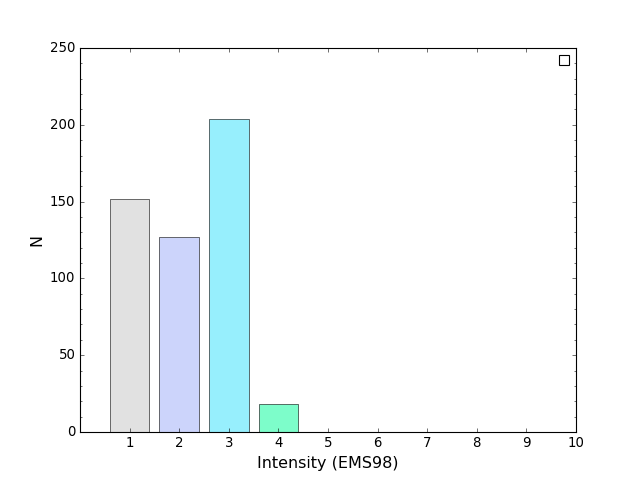

No handles with labels found to put in legend.


In [29]:
mdp_col.plot_histogram('min')

Location-related functionality

In [30]:
mdp_col.get_longitudes()[:50]

array([4.3889, 4.414 , 4.4928, 4.3747, 4.4881, 4.4942, 4.6444, 4.4444,
       4.4642, 4.3475, 4.4711, 4.4331, 4.4964, 4.4639, 4.3314, 4.5619,
       4.3372, 4.5844, 4.3661, 4.5264, 4.6006, 4.6631, 4.3278, 4.6936,
       4.6622, 4.5497, 4.2369, 4.5111, 4.48  , 4.6725, 4.6314, 4.2028,
       4.5328, 4.3622, 5.0869, 4.9336, 5.1708, 5.1139, 4.9919, 4.7394,
       4.8375, 4.7572, 4.9681, 4.8658, 5.1181, 4.9869, 4.9961, 5.0864,
       4.7725, 5.0103])

In [31]:
mdp_col.get_region()

(2.1517, 7.0071, 48.3549, 51.4667)

In [32]:
mdp_col.calc_distances(eq.lon, eq.lat)[:50]

array([130.16999064, 130.56514399, 123.71642116, 130.26342087,
       124.97356862, 127.84343753, 120.80675726, 126.92865101,
       137.59102523, 133.22346213, 125.06730656, 132.85611837,
       122.70261878, 125.84266712, 133.67402474, 119.94432132,
       133.61828736, 119.78133046, 137.75439747, 123.5219825 ,
       125.2991155 , 114.00543553, 136.51974602, 115.40942464,
       111.1695556 , 117.09476844, 139.94005668, 120.98219536,
       122.01550851, 111.62719838, 111.96101622, 141.61821254,
       118.99938522, 130.69147912,  92.00673333, 108.3266333 ,
        79.15315763,  85.99813833,  90.39289175, 108.10806458,
       101.06180173, 105.31083781,  95.17646683, 107.4641385 ,
        83.11653835,  98.14591084, 100.37773726,  89.10812257,
       106.64014905,  86.53144854])

<IPython.core.display.Javascript object>


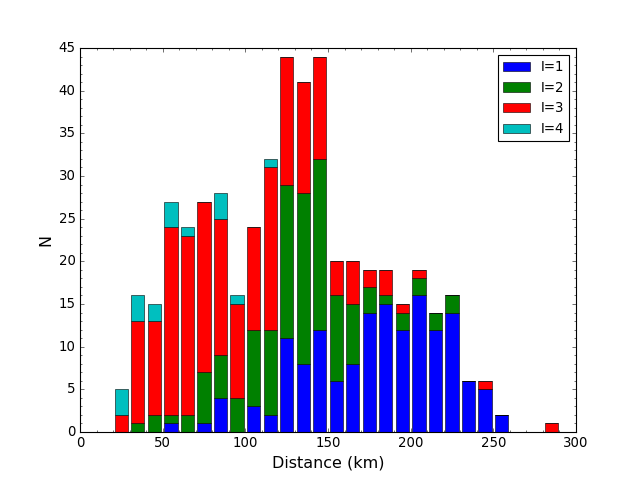

C:\Miniconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Miniconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [33]:
mdp_col.plot_distance_histogram((eq.lon, eq.lat), Imin_or_max='min')

<IPython.core.display.Javascript object>


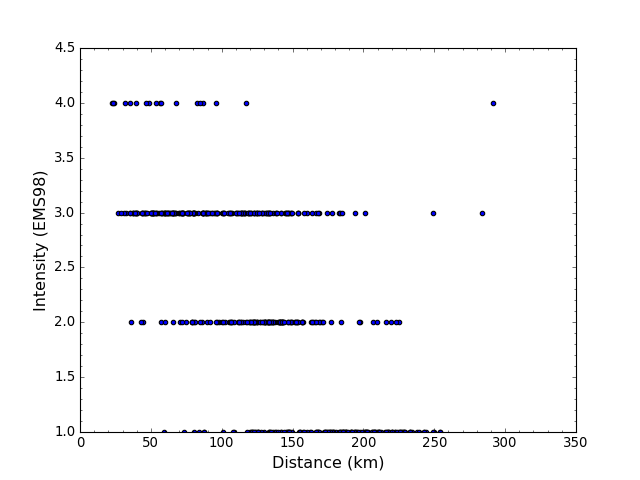

In [34]:
mdp_col.plot_intensity_vs_distance((eq.lon, eq.lat), Imin_or_max='min')

Other properties

In [35]:
mdp_col.get_prop_values('id_com')[:50]

array([  1,   6,  25,  31,  36,  41,  46,  53,  58,  63,  68,  78,  89,
        94,  99, 104, 119, 124, 135, 141, 151, 157, 172, 177, 184, 190,
       196, 204, 225, 235, 242, 256, 263, 269, 277, 282, 287, 299, 304,
       309, 315, 322, 349, 369, 374, 384, 389, 396, 411, 429])

In [36]:
mdp_col.get_unique_prop_values('fiability')

array([80])

Subselecting (by property / distance / region / polygon)

In [37]:
import operator
mdp_col.subselect_by_property('Imin', 3, operator.ge)

<MDPCollection (n=222)>

In [38]:
mdp_col.subselect_by_distance((eq.lon, eq.lat), 100, min_dist=10)

<MDPCollection (n=158)>

In [39]:
mdp_col.subselect_by_region((3, 4, 50, 51))

<MDPCollection (n=77)>

There are equivalent split_by functions

In [40]:
grid_spacing = 15
mdpc_dict = mdp_col.split_by_grid_cells(grid_spacing)
mdpc_dict

{(4.475902985207014, 51.132508628359): <MDPCollection (n=11)>,
 (4.476215128881227, 51.26733534587262): <MDPCollection (n=4)>,
 (4.692064406582187, 51.40176205777692): <MDPCollection (n=2)>,
 (4.476529089598874, 51.402154676778174): <MDPCollection (n=1)>,
 (4.2616099322527505, 51.13250989392376): <MDPCollection (n=7)>,
 (4.691126612824143, 51.266943843770214): <MDPCollection (n=4)>,
 (4.2613018279377695, 51.26733661807045): <MDPCollection (n=3)>,
 (4.690194236858705, 51.13211823889098): <MDPCollection (n=4)>,
 (4.47559264287787, 50.99767527636309): <MDPCollection (n=6)>,
 (4.689267231902242, 50.99728599529627): <MDPCollection (n=5)>,
 (4.261916268068587, 50.99767653532398): <MDPCollection (n=7)>,
 (5.1209297274981465, 51.26499019822076): <MDPCollection (n=3)>,
 (4.9075942585489285, 51.40097810838727): <MDPCollection (n=3)>,
 (5.118757058373957, 51.13017013629088): <MDPCollection (n=4)>,
 (4.904480117603457, 51.131338735141945): <MDPCollection (n=3)>,
 (4.906032679077749, 51.26616212145

Note: no plotting functions (yet): Aggregate first (or use aggregate_by_nothing)

## Aggregation

Aggregation by property / distance / grid cells / polygons

In [57]:
Imin_or_max = 'max'
agg_function = 'mean'
min_num_mdp = 1
ami_col = mdp_col.aggregate_by_property('id_main', Imin_or_max, agg_function, min_num_mdp=min_num_mdp)
ami_col

<AggregatedMacroInfoCollection | by id_main | n=499 | traditional>

In [55]:
ref_pt = (eq.lon, eq.lat)
distance_interval = 10.
Imin_or_max = 'max'
agg_function = 'mean'
min_num_mdp = 3
ami_col = mdp_col.aggregate_by_distance(ref_pt, distance_interval, Imin_or_max, agg_function,
                                    min_num_mdp=min_num_mdp)
ami_col

<AggregatedMacroInfoCollection | by distance | n=23 | traditional>

In [65]:
[ds] = giscat.find_datasets('Bel_villages_polygons', coll_name_pattern='Bel_administrative_ROB')
poly_data = ds.get_gis_filespec('TAB')
value_key = 'ID_ROB'
ami_col = mdp_col.aggregate_by_polygon_data(poly_data, value_key, Imin_or_max, agg_function,
                                       min_num_mdp=min_num_mdp)
ami_col

Number of layers: 1
Number of features in layer 0: 589


<AggregatedMacroInfoCollection | by polygon | n=589 | mixed>

In [98]:
ami_col = mdp_col.aggregate_by_grid_cells(grid_spacing, Imin_or_max, agg_function,
                                          min_num_mdp=min_num_mdp)
ami_col

<AggregatedMacroInfoCollection | by grid_15 | n=154 | traditional>

In [96]:
mdp_col.aggregate_by_nothing(Imin_or_max)

TypeError: __init__() got an unexpected keyword argument 'db_ids'

## AggregatedMacroInfo and AggregatedMacroInfoCollection classes

AggregatedMacroInfoCollection groups a number of AggregatedMacroInfo instances

In [44]:
for ami in ami_col:
    pass
ami

<AggregatedMacroInfo | by polygon | I=nan (EMS98)| mixed>

In [45]:
eqcatalog.macro.AggregatedMacroInfo?

In [46]:
ami.id_earth, ami.id_com

(None, None)

In [47]:
ami.intensity, ami.imt, ami.num_replies

(nan, 'EMS98', 0)

In [48]:
ami.agg_type, ami.data_type

('polygon', 'mixed')

In [49]:
ami.db_ids

[]

In [50]:
ami.lon, ami.lat

(4.381728116779447, 50.82263418245982)

In [51]:
ami.geom_key_val

481

AggregatedMacroInfoCollection instances can be indexed and sliced similar to MDPCollection instances

In [66]:
ami_col.intensities[:50]

array([ 1.,  2.,  1.,  2.,  3.,  1.,  1.,  2.,  1.,  1.,  3., nan,  3.,
       nan,  3.,  1.,  2.,  1., nan, nan,  3., nan,  2.,  2., nan,  1.,
        3., nan,  3.,  3.,  4.,  3.,  2.,  3., nan, nan,  1.,  3.,  3.,
       nan,  3.,  3.,  3.,  3.,  2., nan,  3.,  3.,  1.,  1.])

In [86]:
ami_col = ami_col[~np.isnan(ami_col.intensities)]

In [76]:
ami_col.proc_info

{'agg_method': 'mean', 'min_fiability': 80, 'Imin_or_max': 'max'}

In [68]:
ami_col.Iminmax()

(1.0, 4.0)

In [100]:
ami_col.get_epicentral_distances()[:50]

array([124.17821921, 128.13844073, 120.24760363, 133.67149157,
       138.83880517, 114.06472661, 142.39142759, 109.59666159,
       121.94446978, 107.05867962, 136.84497804,  86.80349025,
       107.22892307,  80.84162755,  95.13047777, 100.24581722,
       136.47852183, 121.5326967 , 137.75262694, 167.42174589,
       152.5755391 , 151.42588114, 122.96143189,  92.19473543,
       106.589049  ,  91.64864248,  77.36522935,  76.71337052,
        93.53436038, 108.21495853,  78.95639088, 126.16834576,
       140.62287036, 111.84525977,  97.71142962, 197.91912914,
       215.08614845, 212.7531146 , 218.42500273, 241.33155597,
       226.39432145, 227.60268603, 226.17510858, 226.94803687,
       241.12637905, 241.85193117, 196.27367783, 197.16299538,
       211.22418324, 229.78445458])

Note: distances only correct if lon, lat is properly set (not the case when aggregating by polygon)

In [92]:
ami_col.to_mdp_collection()

<MDPCollection (n=481)>

For the purpose of plotting, the following mechanism is used to link aggregated macroseismic data with geographic objects (geometries):
- AggregatedMacroInfoCollection has 'macro_geoms' and 'geom_key' properties
- AggregatedMacroInfo instances have 'geom_key_val' property

In [95]:
ami_col.geom_key, ami_col.macro_geoms

('ID_ROB',
 <mapping.layeredbasemap.data_types.polygon.MultiPolygonData at 0x1cd2462ee80>)

Found 154 aggregates (501 replies) for event 1306:


<IPython.core.display.Javascript object>


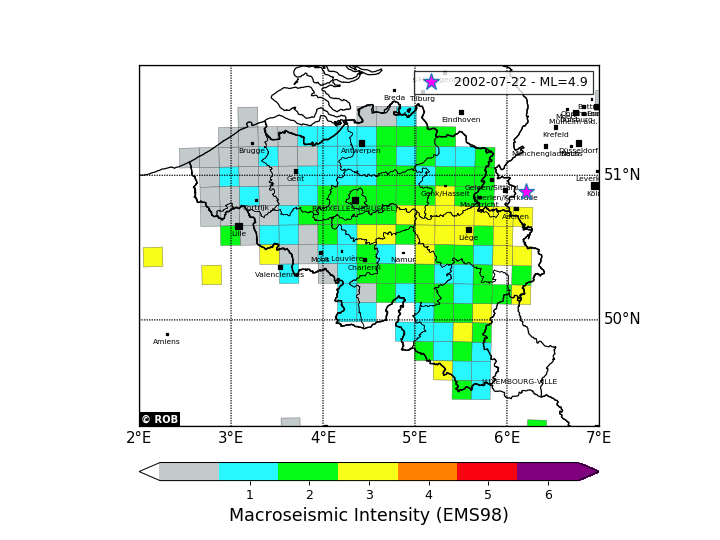

IllegalArgumentException: Points of LinearRing do not form a closed linestring


Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1


IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring


Number of layers: 1
Number of features in layer 0: 1
Skipped invalid polygon
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 11
Number of layers: 1
Number of features in layer 0: 3316


In [99]:
ami_col.plot_map()

Other plotting-related methods:
- export_geotiff
- export_gis
- to_geojson

Interpolation functionality

In [108]:
grid = ami_col.interpolate_grid((25,25))
grid

In [109]:
grid.values

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan, 2.88002399, 3.01675064,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
        2.74665448, 3.06351807, 3.10413815, 2.80324838,        nan,
               nan,        nan,        nan,   

interpolate_isoseismals() is broken in more recent version of matplotlib... I'm looking for a solution

It is also possible to calculate intensity differences with respect to another MacroInfoCollection using the calc_residual_intensity method

In [110]:
ami_col.calc_residual_intensity?